### **Import Libraries**

In [1]:
# Import library yang diperlukan untuk analisis dan pemodelan
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np  # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
from sklearn.feature_extraction.text import TfidfVectorizer  # Untuk ekstraksi fitur dari data teks
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk membagi data dan mencari hyperparameter terbaik
from sklearn.ensemble import RandomForestClassifier  # Algoritma Random Forest untuk klasifikasi
from sklearn.svm import SVC  # Support Vector Classifier untuk klasifikasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve  # Untuk evaluasi model
from sklearn.multioutput import MultiOutputClassifier  # Untuk klasifikasi multi-output
from tensorflow.keras.models import Sequential  # Untuk membangun model neural network
from tensorflow.keras.layers import Dense, Dropout  # Lapisan-lapisan yang digunakan dalam neural network
from tensorflow.keras.callbacks import EarlyStopping  # Untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan
from sklearn.decomposition import PCA  # Untuk reduksi dimensi menggunakan PCA
from sklearn.linear_model import LogisticRegression  # Untuk klasifikasi menggunakan regresi logistik
from wordcloud import WordCloud # Mengimpor library WordCloud dari modul wordcloud untuk membuat visualisasi cloud kata

### **Exploratory Data Analysis**

In [2]:
df = pd.read_csv("train.csv")  # Ganti dengan dataset Anda

In [3]:
df

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
0,Objective-Dependent Uncertainty Driven Retinal...,From diagnosing neovascular diseases to dete...,0,0,1
1,SMARTies: Sentiment Models for Arabic Target E...,We consider entity-level sentiment analysis ...,0,1,0
2,State-Aware Tracker for Real-Time Video Object...,In this work we address the task of semi-sup...,0,0,1
3,On the Performance of Optimized Dense Device-t...,We consider a D2D wireless network where $n$...,1,0,0
4,Design of Minimum Correlated Maximal Clique Se...,This paper proposes an algorithm to search a...,1,0,0
...,...,...,...,...,...
124995,Domain Adaptation for Ear Recognition Using De...,In this paper we have extensively investigat...,0,0,1
124996,DeepHashing using TripletLoss,Hashing is one of the most efficient techniq...,0,0,1
124997,Appearance Based Deep Domain Adaptation for th...,This paper addresses domain adaptation for t...,0,0,1
124998,The Importance of Automatic Syntactic Features...,This paper presents a state-of-the-art syste...,0,1,0


In [4]:
# Menggabungkan kolom 'title' dan 'abstract' menjadi satu kolom 'text'
df['text'] = df['title'] + " " + df['abstract']

In [5]:
# Fitur (X) dan target (y)
X = df['text']
# Target (y) adalah kolom-kolom label, misalnya kolom kategori yang terpisah
y = df[['InformationTheory', 'ComputationalLinguistics', 'ComputerVision']]

##### **WordCloud**

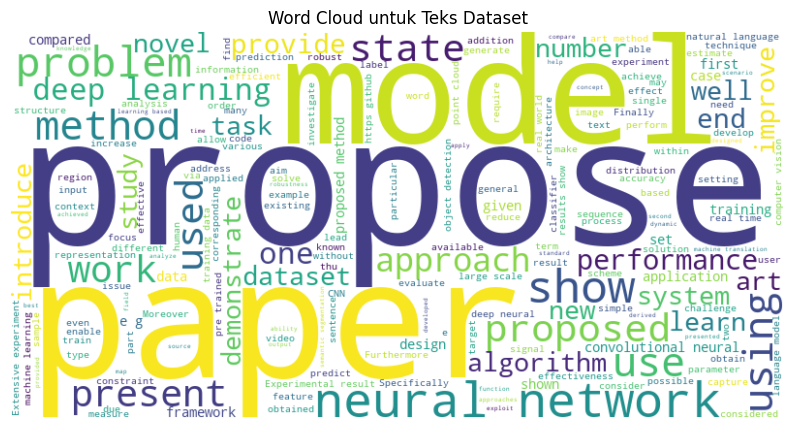

In [6]:
# Menggabungkan semua teks dalam satu string (misalnya dari kolom teks dalam dataframe)
text = ' '.join(df['text'].astype(str))  # Gantilah 'text_column' dengan nama kolom teks Anda

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.title("Word Cloud untuk Teks Dataset")
plt.show()

##### **Analisis Multivariate**

In [7]:
# Membuat objek TfidfVectorizer untuk mengubah teks menjadi fitur TF-IDF dengan jumlah fitur maksimum 5000
tfidf = TfidfVectorizer(max_features=5000)

# Mengaplikasikan TfidfVectorizer pada data teks (X) untuk menghasilkan matriks fitur TF-IDF
X_tfidf = tfidf.fit_transform(X)

# Membuat objek PCA untuk reduksi dimensi, dengan jumlah komponen utama 2
pca = PCA(n_components=2)

# Mengaplikasikan PCA pada matriks fitur TF-IDF yang telah diubah menjadi array
X_pca = pca.fit_transform(X_tfidf.toarray())

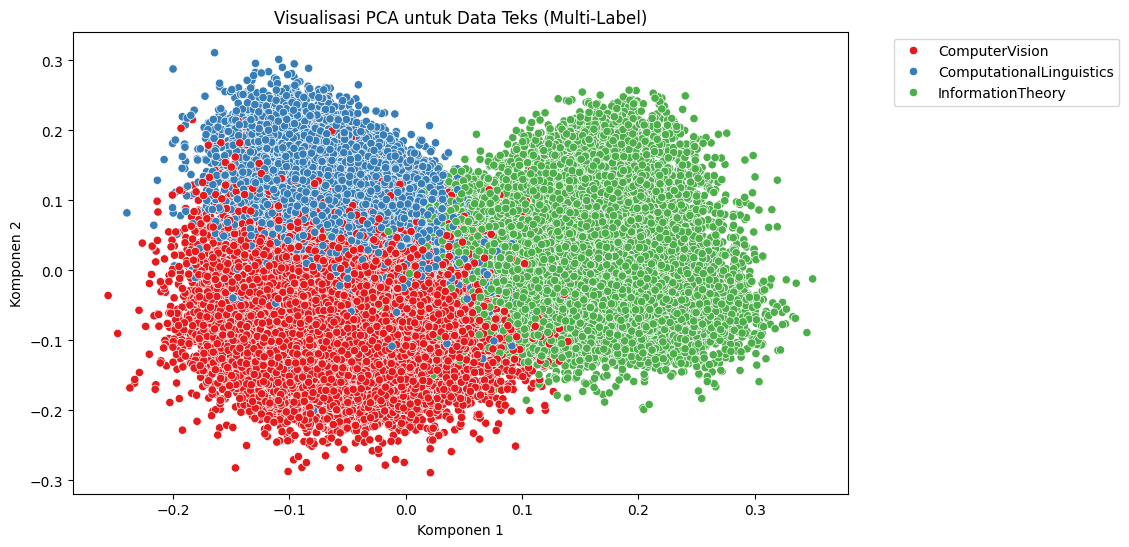

In [8]:
# Menandai sampel dengan lebih dari satu label
# Menerapkan fungsi untuk mendapatkan label yang diterapkan pada setiap sampel, 
# menggabungkan nama label yang diterapkan dengan koma sebagai pemisah
y_labels = y.apply(lambda row: ','.join(row.index[row == 1]), axis=1)

# Mengganti nilai kosong dengan 'NoLabel' untuk sampel yang tidak memiliki label
y_labels = y_labels.replace('', 'NoLabel')  

# Membuat scatter plot untuk visualisasi data setelah reduksi dimensi dengan PCA (multi-label)
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_labels, palette='Set1', legend="full")  # Menampilkan scatter plot dengan warna berdasarkan label
plt.title("Visualisasi PCA untuk Data Teks (Multi-Label)")  # Menambahkan judul pada plot
plt.xlabel("Komponen 1")  # Label untuk sumbu x
plt.ylabel("Komponen 2")  # Label untuk sumbu y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legend di luar plot
plt.show()  # Menampilkan plot

### **Data Preprocessing**

In [ ]:
# Membagi data menjadi training set dan temporary set (X_train, X_temp, y_train, y_temp)
# 70% data digunakan untuk pelatihan dan 30% sisanya akan dibagi lagi untuk validasi dan testing
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Membagi temporary set menjadi validation set dan test set (X_val, X_test, y_val, y_test)
# 50% dari data temporary digunakan untuk validasi dan sisanya untuk testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### **Modeling**

##### **Random Forest**

In [10]:
# Membuat model RandomForestClassifier tanpa parameter tuning
rf_model = RandomForestClassifier(random_state=42)

# Membuat MultiOutputClassifier dengan model RandomForestClassifier
multi_rf = MultiOutputClassifier(rf_model, n_jobs=-1)

# Melatih model pada data pelatihan
multi_rf.fit(X_train, y_train)

# Prediksi pada data uji
y_rf_pred = multi_rf.predict(X_test)

##### **Logistic Regression**

In [11]:
# Jika data sparse, pastikan menggunakan .toarray() hanya jika diperlukan
X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train.copy()
y_train = y_train.copy()

# Membuat model LogisticRegression tanpa parameter tuning
logreg_model = MultiOutputClassifier(LogisticRegression(random_state=42, n_jobs=-1))

# Melatih model pada data pelatihan
logreg_model.fit(X_train, y_train)

# Prediksi pada data uji
y_logreg_pred = logreg_model.predict(X_test)

##### **Neural Network**

In [12]:
# Menentukan dimensi input untuk model neural network berdasarkan jumlah fitur di training set
input_dim = X_train.shape[1]

# Membangun model neural network menggunakan Keras Sequential API
nn_model = Sequential([
    # Lapisan pertama: Dense layer dengan 256 unit dan fungsi aktivasi ReLU
    # Input dimensi ditentukan oleh jumlah fitur dalam X_train
    Dense(256, activation='relu', input_dim=input_dim),
    
    # Dropout layer untuk mengurangi overfitting, dengan rate 0.4
    Dropout(0.4),
    
    # Lapisan kedua: Dense layer dengan 128 unit dan fungsi aktivasi ReLU
    Dense(128, activation='relu'),
    
    # Dropout layer untuk mengurangi overfitting, dengan rate 0.3
    Dropout(0.3),
    
    # Lapisan output: Dense layer dengan jumlah unit sama dengan jumlah label (y_train.shape[1]) 
    # dan fungsi aktivasi sigmoid untuk klasifikasi multi-label
    Dense(y_train.shape[1], activation='sigmoid')
])

# Mengkompilasi model dengan optimizer Adam, fungsi loss binary_crossentropy untuk klasifikasi multi-label,
# dan metrik akurasi untuk evaluasi
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mengatur EarlyStopping untuk menghentikan pelatihan jika validasi loss tidak membaik setelah 5 epoch
# dengan mengembalikan bobot terbaik pada model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

c:\Users\silvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Melatih model neural network menggunakan data pelatihan (X_train dan y_train) dan data validasi (X_val dan y_val)
# Tidak perlu menggunakan .toarray() jika X_train dan X_val sudah dalam bentuk numpy.ndarray
history = nn_model.fit(
    X_train, y_train,  # Data pelatihan (fitur dan target)
    epochs=50,  # Menentukan jumlah epoch untuk pelatihan
    batch_size=64,  # Ukuran batch yang digunakan dalam setiap iterasi
    validation_data=(X_val, y_val),  # Data validasi untuk memantau kinerja selama pelatihan
    callbacks=[early_stop],  # Menggunakan early stopping untuk menghentikan pelatihan jika tidak ada perbaikan pada validasi loss
    verbose=1  # Menampilkan informasi selama pelatihan
)

# Membuat prediksi probabilitas untuk data uji (X_test) menggunakan model neural network
y_nn_pred_prob = nn_model.predict(X_test)  # Tidak perlu menggunakan .toarray() jika X_test sudah dalam bentuk numpy.ndarray

# Mengonversi probabilitas menjadi label biner (0 atau 1) dengan ambang batas 0.5
y_nn_pred = (y_nn_pred_prob > 0.5).astype(int)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8929 - loss: 0.1637 - val_accuracy: 0.9594 - val_loss: 0.0719
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9684 - loss: 0.0577 - val_accuracy: 0.9583 - val_loss: 0.0731
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9740 - loss: 0.0447 - val_accuracy: 0.9577 - val_loss: 0.0782
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9784 - loss: 0.0358 - val_accuracy: 0.9554 - val_loss: 0.0879
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9813 - loss: 0.0296 - val_accuracy: 0.9546 - val_loss: 0.0986
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0252 - val_accuracy: 0.9537 - val_loss: 0.1094
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### **Evaluasi**

In [14]:
# Fungsi untuk mengevaluasi model menggunakan berbagai metrik evaluasi seperti Akurasi, Precision, Recall, F1 Score, dan ROC AUC
def evaluate_model(y_true, y_pred, model_name):
    """Evaluasi model dengan berbagai metrik."""
    # Menghitung berbagai metrik evaluasi dan menyimpannya dalam dictionary
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),  # Akurasi: Proporsi prediksi yang benar
        "Precision": precision_score(y_true, y_pred, average='micro'),  # Precision: Proporsi prediksi positif yang benar
        "Recall": recall_score(y_true, y_pred, average='micro'),  # Recall: Proporsi label positif yang berhasil diprediksi
        "F1 Score": f1_score(y_true, y_pred, average='micro'),  # F1 Score: Harmonik rata-rata antara precision dan recall
        "ROC AUC": roc_auc_score(y_true, y_pred, average='micro')  # ROC AUC: Area under the ROC curve untuk evaluasi model
    }
    
    # Menampilkan hasil evaluasi untuk model yang diberikan
    print(f"\nEvaluasi untuk {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")  # Menampilkan nilai metrik dengan 4 digit desimal
    
    return metrics  # Mengembalikan dictionary yang berisi nilai metrik evaluasi

# Evaluasi model Random Forest menggunakan data uji (y_test dan y_rf_pred)
rf_metrics = evaluate_model(y_test, y_rf_pred, "Random Forest")

# Evaluasi model SVC menggunakan data uji (y_test dan y_logreg_pred)
logreg_metrics = evaluate_model(y_test, y_logreg_pred, "SVC")

# Evaluasi model Neural Network menggunakan data uji (y_test dan y_nn_pred)
nn_metrics = evaluate_model(y_test, y_nn_pred, "Neural Network")


Evaluasi untuk Random Forest:
Accuracy: 0.9233
Precision: 0.9449
Recall: 0.9362
F1 Score: 0.9405
ROC AUC: 0.9544

Evaluasi untuk SVC:
Accuracy: 0.9456
Precision: 0.9629
Recall: 0.9523
F1 Score: 0.9576
ROC AUC: 0.9670

Evaluasi untuk Neural Network:
Accuracy: 0.9567
Precision: 0.9601
Recall: 0.9584
F1 Score: 0.9592
ROC AUC: 0.9692


### **Visualisasi**

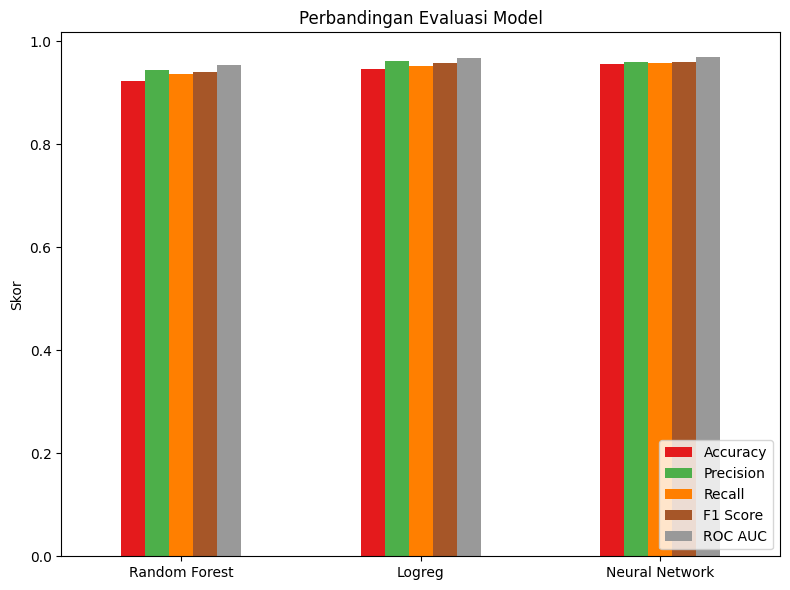

In [15]:
# Daftar nama model dan metrik yang sudah dihitung untuk setiap model
models = ["Random Forest", "Logreg", "Neural Network"]
metrics = [rf_metrics, logreg_metrics, nn_metrics]

# Membuat DataFrame untuk menyimpan metrik evaluasi setiap model
metrics_df = pd.DataFrame(metrics, index=models)

# Membuat bar plot untuk membandingkan metrik evaluasi dari berbagai model
metrics_df.plot(kind='bar', figsize=(8, 6), colormap="Set1")  # Mengubah colormap di sini (Set1 untuk warna yang lebih mencolok)

# Menambahkan judul dan label pada sumbu y
plt.title("Perbandingan Evaluasi Model")
plt.ylabel("Skor")

# Mengatur rotasi label sumbu x agar mudah dibaca
plt.xticks(rotation=0)

# Menampilkan legenda di posisi bawah kanan
plt.legend(loc="lower right")

# Menyesuaikan layout agar elemen plot tidak tumpang tindih
plt.tight_layout()  # Untuk memastikan tata letak sesuai dan tidak terpotong

# Menampilkan plot
plt.show()

##### **Random Forest**

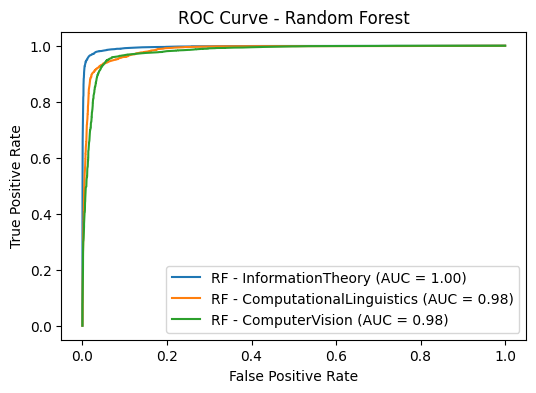

In [16]:
# Menyiapkan figur dengan ukuran yang sesuai untuk visualisasi ROC curve
plt.figure(figsize=(6, 4))

# Untuk setiap label, plot ROC curve berdasarkan hasil prediksi model Random Forest
for i, label in enumerate(y_train.columns):
    # Menggunakan model multi-output (multi_rf) untuk mendapatkan probabilitas prediksi untuk setiap label
    rf_prob = multi_rf.predict_proba(X_test)  # Prediksi probabilitas untuk semua label
    # Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) untuk setiap label
    rf_fpr, rf_tpr, _ = roc_curve(y_test[label], rf_prob[i][:, 1])  # Ambil probabilitas kelas positif (kelas 1)
    # Menghitung nilai AUC (Area Under the Curve) untuk setiap label
    auc_score = roc_auc_score(y_test[label], rf_prob[i][:, 1])  # Hitung AUC
    
    # Plot ROC curve untuk setiap label dengan informasi AUC
    plt.plot(rf_fpr, rf_tpr, label=f'RF - {label} (AUC = {auc_score:.2f})')

# Menambahkan judul dan label sumbu
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')  # Label sumbu x: False Positive Rate
plt.ylabel('True Positive Rate')   # Label sumbu y: True Positive Rate

# Menambahkan legenda di posisi terbaik
plt.legend(loc='best')

# Menampilkan plot
plt.show()

##### **Logistic Regression**

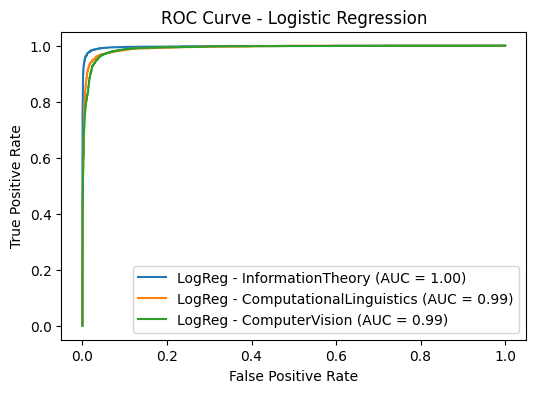

In [17]:
# Menyiapkan figur dengan ukuran yang sesuai untuk visualisasi ROC curve
plt.figure(figsize=(6, 4))

# Untuk setiap label, plot ROC curve berdasarkan hasil prediksi model Logistic Regression
for i, label in enumerate(y_train.columns):
    # Menggunakan model logreg_model untuk mendapatkan probabilitas prediksi untuk setiap label
    logreg_prob = logreg_model.predict_proba(X_test)  # Prediksi probabilitas untuk semua label
    # Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) untuk setiap label
    logreg_fpr, logreg_tpr, _ = roc_curve(y_test[label], logreg_prob[i][:, 1])  # Ambil probabilitas kelas positif (kelas 1)
    # Menghitung nilai AUC (Area Under the Curve) untuk setiap label
    auc_score = roc_auc_score(y_test[label], logreg_prob[i][:, 1])  # Hitung AUC
    
    # Plot ROC curve untuk setiap label dengan informasi AUC
    plt.plot(logreg_fpr, logreg_tpr, label=f'LogReg - {label} (AUC = {auc_score:.2f})')

# Menambahkan judul dan label sumbu
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')  # Label sumbu x: False Positive Rate
plt.ylabel('True Positive Rate')   # Label sumbu y: True Positive Rate

# Menambahkan legenda di posisi terbaik
plt.legend(loc='best')

# Menampilkan plot
plt.show()

##### **Neural Network**

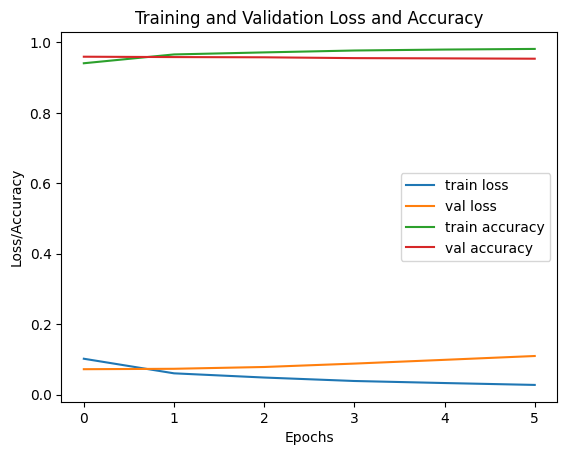

In [18]:
# Plotting history training (loss dan akurasi)
# Menampilkan grafik loss selama training dan validasi
plt.plot(history.history['loss'], label='train loss')  # Grafik loss pada data training
plt.plot(history.history['val_loss'], label='val loss')  # Grafik loss pada data validasi

# Menampilkan grafik akurasi selama training dan validasi
plt.plot(history.history['accuracy'], label='train accuracy')  # Grafik akurasi pada data training
plt.plot(history.history['val_accuracy'], label='val accuracy')  # Grafik akurasi pada data validasi

# Menambahkan judul dan label pada sumbu
plt.title('Training and Validation Loss and Accuracy')  # Judul plot
plt.xlabel('Epochs')  # Label sumbu x: jumlah epoch
plt.ylabel('Loss/Accuracy')  # Label sumbu y: loss dan akurasi

# Menambahkan legenda untuk membedakan antara grafik training dan validasi
plt.legend()

# Menampilkan plot
plt.show()